In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt

In [11]:
import os 
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
testing_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")

Current Dir  c:\Users\pavan\Documents\potato-disease-project


In [12]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [13]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [14]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [15]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation="relu",input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation="relu"))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation="relu"))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Dense(units=3,activation="softmax"))


c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 738ms/step - accuracy: 0.9415 - loss: 0.1359 - val_accuracy: 0.9267 - val_loss: 0.1505
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 741ms/step - accuracy: 0.9821 - loss: 0.0632 - val_accuracy: 0.9367 - val_loss: 0.1516
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 759ms/step - accuracy: 0.9858 - loss: 0.0423 - val_accuracy: 0.9467 - val_loss: 0.1274
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 752ms/step - accuracy: 0.9579 - loss: 0.1094 - val_accuracy: 0.9567 - val_loss: 0.1219
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 739ms/step - accuracy: 0.9820 - loss: 0.0413 - val_accuracy: 0.9667 - val_loss: 0.0956
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 723ms/step - accuracy: 0.9892 - loss: 0.0344 - val_accuracy: 0.9567 - val_loss: 0.1225
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 721ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9633 - val_loss: 0.1058
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 750ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accu

In [28]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.9464 - loss: 0.1215
Training accuracy: 0.949999988079071


In [29]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.8947 - loss: 0.3680
Validation accuracy: 0.8899999856948853


In [31]:
cnn.save('trained_plant_disease_model.keras')

In [32]:
training_history.history

{'accuracy': [0.948888897895813,
  0.9733333587646484,
  0.9866666793823242,
  0.9599999785423279,
  0.9888888597488403,
  0.9911110997200012,
  1.0,
  1.0,
  1.0,
  0.9855555295944214],
 'loss': [0.1363387107849121,
  0.07766971737146378,
  0.037224672734737396,
  0.11104407161474228,
  0.0345013365149498,
  0.026976220309734344,
  0.004943298641592264,
  0.0019714124500751495,
  0.0027556850109249353,
  0.0335959866642952],
 'val_accuracy': [0.9266666769981384,
  0.9366666674613953,
  0.9466666579246521,
  0.9566666483879089,
  0.9666666388511658,
  0.9566666483879089,
  0.9633333086967468,
  0.9599999785423279,
  0.9433333277702332,
  0.8899999856948853],
 'val_loss': [0.15053583681583405,
  0.1515529900789261,
  0.12742139399051666,
  0.12191549688577652,
  0.09561014175415039,
  0.12251641601324081,
  0.10584239661693573,
  0.13638634979724884,
  0.15910963714122772,
  0.39586374163627625]}

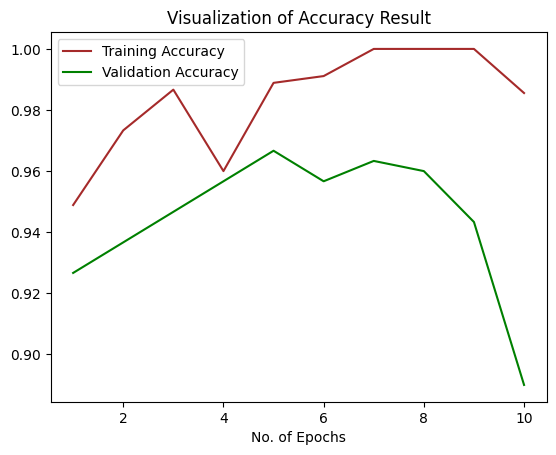

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()